<a href="https://colab.research.google.com/github/sarobutt/Caseness-in-UKHLS-data/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
import pandas as pd
import pylab as p
from sklearn.model_selection import train_test_split
import numpy as np
import math
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
import imblearn
from google.colab import drive
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score

# ***Data Check and Preprocessing***

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataframe.csv')
df
df.describe
df['k_scghq2_dv'].value_counts()

0     14691
1      3624
2      1856
3      1296
4       944
5       745
6       705
7       600
8       536
9       467
12      465
11      441
10      433
Name: k_scghq2_dv, dtype: int64

In [ ]:
k_scghq2_dv = []
for i in df['k_scghq2_dv']:
    if i < 4:
        k_scghq2_dv.append(0)
    else :
        k_scghq2_dv.append(1)
df['Target variable'] = k_scghq2_dv
df.drop('k_scghq2_dv', axis = 1, inplace = True)
df.head()

,k_smoker,k_sex,k_age_dv,k_finfut,k_marstat_dv,k_scfcritic,k_scfundstnd,k_scfrely,k_health,k_auditc1,k_hiqual_dv,k_jbstat,k_fimngrs_dv,Target variable
0,2,2,34,3,1,1,1,1,2,1,1,5,2905.199951,1
1,2,2,42,2,4,3,3,2,1,2,1,2,3209.000000,0
2,2,2,36,2,1,4,3,1,2,2,3,5,4363.000000,0
3,2,2,40,1,1,4,3,2,2,1,4,2,2663.000000,0
4,2,2,29,1,1,4,1,1,2,1,2,2,2700.000000,0


# ***Splitting the Predictor and Response Variable***

In [ ]:
X=df.drop(df.columns[13], axis=1)
y=df['Target variable']

# ***Logistic Regression***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=109) # 70% training and 30% test
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train, y_train)
y_pred = LogReg_clf.predict(X_test)
acc =  (accuracy_score(y_test, y_pred))*100

cm = confusion_matrix(y_test, y_pred)

print('Acuuracy is:', acc)

print("Confusion Matrix \n", cm)


Acuuracy is: 81.18191314729145
Confusion Matrix 
 [[5374   40]
 [1221   66]]


F1-score 0.49487746597326476
Precision 0.7187506258314618
Recall 0.5219468993019049
Log loss 0.45038390836582387
Feature: 0, Score: -0.09532
Feature: 1, Score: 0.33089
Feature: 2, Score: -0.27544
Feature: 3, Score: -0.12070
Feature: 4, Score: 0.07725
Feature: 5, Score: -0.09803
Feature: 6, Score: 0.14418
Feature: 7, Score: 0.14840
Feature: 8, Score: -0.46246
Feature: 9, Score: 0.01305
Feature: 10, Score: -0.08908
Feature: 11, Score: 0.02733
Feature: 12, Score: -0.00914
Feature Importance


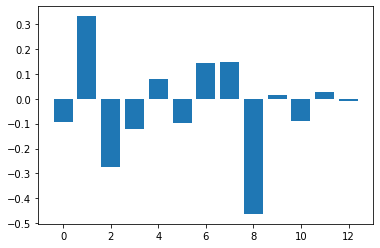

In [ ]:
print('F1-score',f1_score(y_test, y_pred, average="macro"))
print('Precision',precision_score(y_test, y_pred, average="macro"))
print('Recall',recall_score(y_test, y_pred, average="macro"))   
logloss = log_loss(y_test, LogReg_clf.predict_proba(X_test))
print('Log loss',logloss) 

importance = LogReg_clf.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
print('Feature Importance')
pyplot.show()


# ***AUC-ROC***

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.696


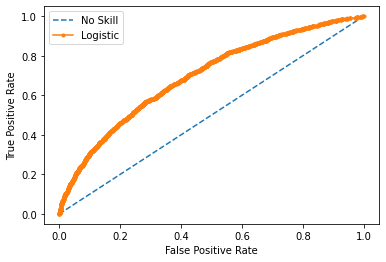

AUC: 0.522


In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = LogReg_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

# ***Logistic Regression with K-fold***

In [ ]:

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    cm = confusion_matrix(y_test, pred_values)
    report = classification_report(y_test, pred_values)
    print(report)
     
avg_acc_score=sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2187
           1       0.52      0.05      0.09       494

    accuracy                           0.82      2681
   macro avg       0.67      0.52      0.49      2681
weighted avg       0.77      0.82      0.75      2681

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2196
           1       0.53      0.05      0.09       485

    accuracy                           0.82      2681
   macro avg       0.68      0.52      0.49      2681
weighted avg       0.77      0.82      0.75      2681

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2213
           1       0.48      0.05      0.09       468

    accuracy                           0.82      2681
   macro avg       0.65      0.52      0.49      2681
weighted avg       0.77      0.82      0.76      2681

              preci

# ***Logistic Regression with Under sampling***

In [ ]:
ros=RandomUnderSampler(random_state=0)
X_re,y_rr=ros.fit_resample(X,y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_rr, test_size=0.25,random_state=109)
 
# 70% training and 30% test
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train_re, y_train_re)
y_pred = LogReg_clf.predict(X_test_re)
acc =  (accuracy_score(y_test_re, y_pred))*100

cm = confusion_matrix(y_test_re, y_pred)

print('Acuuracy is:', acc)

print("Confusion Matrix \n", cm)

Acuuracy is: 62.40629685157422
Confusion Matrix 
 [[855 434]
 [569 810]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test_re, y_pred)
report = classification_report(y_test_re, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.66      0.63      1289
           1       0.65      0.59      0.62      1379

    accuracy                           0.62      2668
   macro avg       0.63      0.63      0.62      2668
weighted avg       0.63      0.62      0.62      2668



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.677


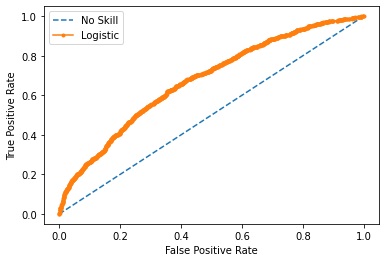

AUC: 0.625


In [ ]:
ns_probs = [0 for _ in range(len(y_test_re))]
lr_probs = LogReg_clf.predict_proba(X_test_re)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_re, ns_probs)
lr_auc = roc_auc_score(y_test_re, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_re, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_re, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_re, y_pred)
auc = roc_auc_score(y_test_re, y_pred)
print('AUC: %.3f' % auc)

# ***Logistic Regression with Over Sampling***

In [ ]:
ros=RandomOverSampler(random_state=0)
X_re,y_rr=ros.fit_resample(X,y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_rr, test_size=0.25,random_state=109)
 
# 70% training and 30% test
LogReg_clf = LogisticRegression(random_state = 0)

LogReg_clf.fit(X_train_re, y_train_re)
y_pred = LogReg_clf.predict(X_test_re)
acc =  (accuracy_score(y_test_re, y_pred))*100

cm = confusion_matrix(y_test_re, y_pred)

print('Acuuracy is:', acc)

print("Confusion Matrix \n", cm)

Acuuracy is: 63.1171976895845
Confusion Matrix 
 [[3470 1861]
 [2098 3305]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cm = confusion_matrix(y_test_re, y_pred)
report = classification_report(y_test_re, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.65      0.64      5331
           1       0.64      0.61      0.63      5403

    accuracy                           0.63     10734
   macro avg       0.63      0.63      0.63     10734
weighted avg       0.63      0.63      0.63     10734



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.685


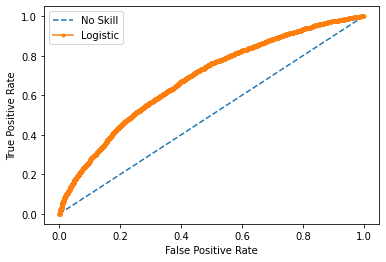

AUC: 0.631


In [ ]:
ns_probs = [0 for _ in range(len(y_test_re))]
lr_probs = LogReg_clf.predict_proba(X_test_re)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_re, ns_probs)
lr_auc = roc_auc_score(y_test_re, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_re, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_re, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_re, y_pred)
auc = roc_auc_score(y_test_re, y_pred)
print('AUC: %.3f' % auc)

# ***K Neighbour without K-fold***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42) # 70% training and 30% test
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)
model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)


0.7794359050887927


col_0,0,1
Target variable,,
0,5027,351
1,1127,196


In [ ]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5378
           1       0.36      0.15      0.21      1323

    accuracy                           0.78      6701
   macro avg       0.59      0.54      0.54      6701
weighted avg       0.73      0.78      0.74      6701



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.615


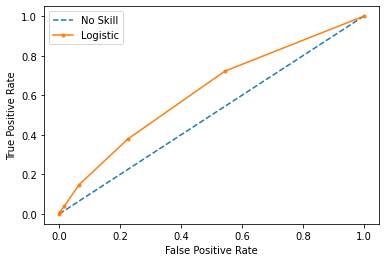

AUC: 0.541


In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)
print('AUC: %.3f' % auc)

# ***K-neighbour with K-FOLD***

In [ ]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model_2 = KNeighborsClassifier()
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model_2.fit(X_train,y_train)
    pred_values = model_2.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    cm = confusion_matrix(y_test, pred_values)
    print("K=Neighbours")
    report = classification_report(y_test, pred_values)
    print(report)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

K=Neighbours
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2187
           1       0.18      0.05      0.08       494

    accuracy                           0.78      2681
   macro avg       0.50      0.50      0.48      2681
weighted avg       0.70      0.78      0.73      2681

K=Neighbours
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2196
           1       0.33      0.10      0.15       485

    accuracy                           0.80      2681
   macro avg       0.58      0.53      0.52      2681
weighted avg       0.74      0.80      0.75      2681

K=Neighbours
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2213
           1       0.24      0.07      0.11       468

    accuracy                           0.80      2681
   macro avg       0.54      0.51      0.50      2681
weighted avg       0.73      0.80  

# ***K-neighbour with Under Sampling***

In [ ]:
ros=RandomUnderSampler(random_state=0)
X_re,y_rr=ros.fit_resample(X,y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_rr, test_size=0.25,random_state=109) 

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train_re)

X_test = sc.transform(X_test_re)
model=KNeighborsClassifier()
model.fit(X_train_re,y_train_re)
y_predict=model.predict(X_test_re)
print(accuracy_score(y_test_re,y_predict))
pd.crosstab(y_test_re,y_predict)

0.5431034482758621


col_0,0,1
Target variable,,
0,734,555
1,664,715


In [ ]:
report = classification_report(y_test_re, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1289
           1       0.56      0.52      0.54      1379

    accuracy                           0.54      2668
   macro avg       0.54      0.54      0.54      2668
weighted avg       0.54      0.54      0.54      2668



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.553


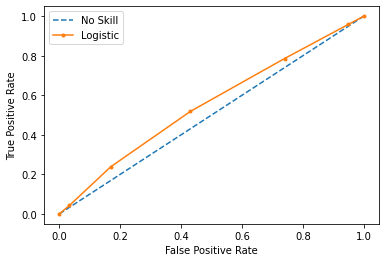

AUC: 0.544


In [ ]:
ns_probs = [0 for _ in range(len(y_test_re))]
lr_probs = model.predict_proba(X_test_re)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_re, ns_probs)
lr_auc = roc_auc_score(y_test_re, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_re, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_re, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_re, y_predict)
auc = roc_auc_score(y_test_re, y_predict)
print('AUC: %.3f' % auc)

# ***K-neighbour with Over Sampling***

In [ ]:
ros=RandomOverSampler(random_state=0)
X_re,y_rr=ros.fit_resample(X,y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_rr, test_size=0.25,random_state=109) 

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train_re)

X_test = sc.transform(X_test_re)
model=KNeighborsClassifier()
model.fit(X_train_re,y_train_re)
y_predict=model.predict(X_test_re)
print(accuracy_score(y_test_re,y_predict))
pd.crosstab(y_test_re,y_predict)

0.6955468604434507


col_0,0,1
Target variable,,
0,3173,2158
1,1110,4293


In [ ]:
report = classification_report(y_test_re, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.60      0.66      5331
           1       0.67      0.79      0.72      5403

    accuracy                           0.70     10734
   macro avg       0.70      0.69      0.69     10734
weighted avg       0.70      0.70      0.69     10734



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.768


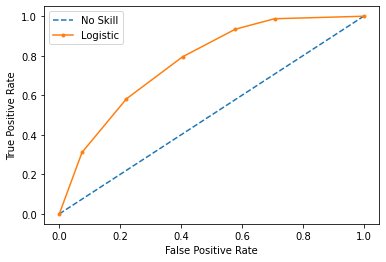

AUC: 0.695


In [ ]:
ns_probs = [0 for _ in range(len(y_test_re))]
lr_probs = model.predict_proba(X_test_re)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_re, ns_probs)
lr_auc = roc_auc_score(y_test_re, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_re, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_re, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_re, y_predict)
auc = roc_auc_score(y_test_re, y_predict)
print('AUC: %.3f' % auc)

# ***Random Forest***

0.7819728398746456
Feature: 0, Score: 0.01971
Feature: 1, Score: 0.01959
Feature: 2, Score: 0.22045
Feature: 3, Score: 0.03700
Feature: 4, Score: 0.05034
Feature: 5, Score: 0.05684
Feature: 6, Score: 0.05885
Feature: 7, Score: 0.05171
Feature: 8, Score: 0.03251
Feature: 9, Score: 0.02641
Feature: 10, Score: 0.08414
Feature: 11, Score: 0.06711
Feature: 12, Score: 0.27536


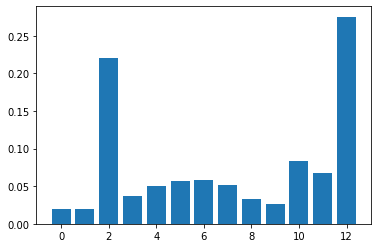

              precision    recall  f1-score   support

           0       0.81      0.96      0.87      5316
           1       0.40      0.12      0.18      1385

    accuracy                           0.78      6701
   macro avg       0.61      0.54      0.53      6701
weighted avg       0.72      0.78      0.73      6701



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
predictions
acc = accuracy_score(predictions , y_test)
print(acc)
pd.crosstab(y_test,predictions)
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
report = classification_report(y_test, predictions)
print(report)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.662


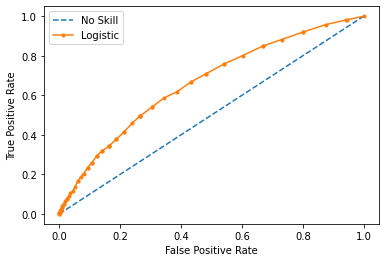

AUC: 0.536


In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

# ***Random Forest with K-fold***

In [ ]:
k = 10
kf = KFold(n_splits=k, random_state=None)
model_2 = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
 
acc_score = []

for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model_2.fit(X_train,y_train)
    pred_values = model_2.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    cm = confusion_matrix(y_test, pred_values)
    print("Random Forest")
    report = classification_report(y_test, pred_values)
    print(report)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Random Forest
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2187
           1       0.49      0.14      0.22       494

    accuracy                           0.81      2681
   macro avg       0.66      0.55      0.56      2681
weighted avg       0.77      0.81      0.77      2681

Random Forest
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2196
           1       0.41      0.14      0.21       485

    accuracy                           0.81      2681
   macro avg       0.62      0.55      0.55      2681
weighted avg       0.76      0.81      0.77      2681

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2213
           1       0.40      0.16      0.23       468

    accuracy                           0.81      2681
   macro avg       0.62      0.55      0.56      2681
weighted avg       0.77      0.8

# ***Random Forest With Under Sampling***

In [ ]:
ros=RandomUnderSampler(random_state=0)
X_re,y_rr=ros.fit_resample(X,y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_rr, test_size=0.25,random_state=109)

0.636431784107946
Feature: 0, Score: 0.01881
Feature: 1, Score: 0.02517
Feature: 2, Score: 0.21744
Feature: 3, Score: 0.04402
Feature: 4, Score: 0.05312
Feature: 5, Score: 0.05646
Feature: 6, Score: 0.06012
Feature: 7, Score: 0.05446
Feature: 8, Score: 0.04639
Feature: 9, Score: 0.02809
Feature: 10, Score: 0.08469
Feature: 11, Score: 0.06401
Feature: 12, Score: 0.24722


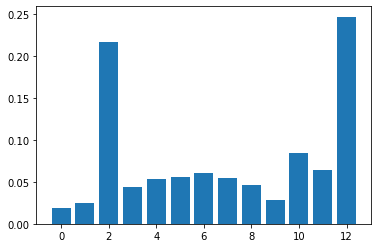

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1289
           1       0.66      0.63      0.64      1379

    accuracy                           0.64      2668
   macro avg       0.64      0.64      0.64      2668
weighted avg       0.64      0.64      0.64      2668



In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_re, y_train_re)
predictions = rf_model.predict(X_test_re)
predictions
acc = accuracy_score(predictions , y_test_re)
print(acc)
pd.crosstab(y_test_re,predictions)
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
report = classification_report(y_test_re, predictions)
print(report)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.684


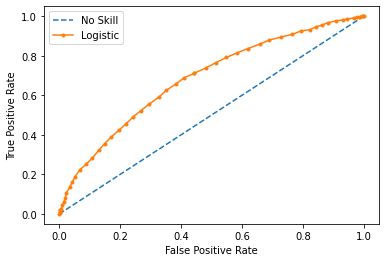

AUC: 0.637


In [ ]:
ns_probs = [0 for _ in range(len(y_test_re))]
lr_probs = rf_model.predict_proba(X_test_re)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_re, ns_probs)
lr_auc = roc_auc_score(y_test_re, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_re, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_re, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_re, predictions)
auc = roc_auc_score(y_test_re, predictions)
print('AUC: %.3f' % auc)

# ***Random Forest with Over Sampling***

In [ ]:
ros=RandomOverSampler(random_state=0)
X_re,y_rr=ros.fit_resample(X,y)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_rr, test_size=0.25,random_state=109)

0.9231414197875908
Feature: 0, Score: 0.01788
Feature: 1, Score: 0.02417
Feature: 2, Score: 0.22892
Feature: 3, Score: 0.03860
Feature: 4, Score: 0.05006
Feature: 5, Score: 0.05514
Feature: 6, Score: 0.05487
Feature: 7, Score: 0.04774
Feature: 8, Score: 0.04138
Feature: 9, Score: 0.02548
Feature: 10, Score: 0.08468
Feature: 11, Score: 0.06242
Feature: 12, Score: 0.26865


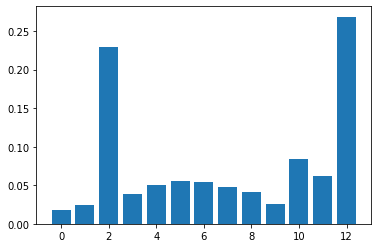

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5331
           1       0.89      0.97      0.93      5403

    accuracy                           0.92     10734
   macro avg       0.93      0.92      0.92     10734
weighted avg       0.93      0.92      0.92     10734



In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_re, y_train_re)
predictions = rf_model.predict(X_test_re)
predictions
acc = accuracy_score(predictions , y_test_re)
print(acc)
pd.crosstab(y_test_re,predictions)
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
report = classification_report(y_test_re, predictions)
print(report)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.984


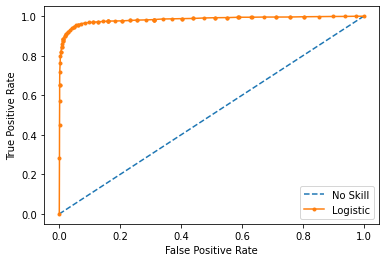

AUC: 0.923


In [ ]:
ns_probs = [0 for _ in range(len(y_test_re))]
lr_probs = rf_model.predict_proba(X_test_re)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_re, ns_probs)
lr_auc = roc_auc_score(y_test_re, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_re, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_re, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_re, predictions)
auc = roc_auc_score(y_test_re, predictions)
print('AUC: %.3f' % auc)